In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
paid_transaction = pd.read_excel('/gdrive/MyDrive/Data/pt.xlsx')
paid_transaction.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


In [5]:
paid_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Paid Date           12000 non-null  int64  
 1   Order Number        12000 non-null  int64  
 2   First Name          11996 non-null  object 
 3   Last Name           11996 non-null  object 
 4   Meta Category       12000 non-null  object 
 5   Product Name        12000 non-null  object 
 6   Transaction Amount  12000 non-null  int64  
 7   Seller Discount     12000 non-null  int64  
 8   Sales Discount      12000 non-null  float64
 9   Delivery Fee        12000 non-null  int64  
 10  Other Discount      12000 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


# Data Manipulation

## Combining First Name and Last Name Become Full Name

In [6]:
full_name = paid_transaction['First Name'].str.title() + ' . ' + paid_transaction['Last Name'].str.title().str[:1]
full_name

0        Elvride . A
1          Basir . N
2          Citra . A
3           Dian . R
4          Rizal . T
            ...     
11995     Fitrah . G
11996    Djebeng . S
11997       Amik . E
11998       Anna . A
11999     Nidyah . A
Length: 12000, dtype: object

In [7]:
# Make Full Name in index 4 beside Last Name
paid_transaction.insert(4,'Full Name', full_name)
paid_transaction.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


In [8]:
paid_transaction[['First Name', 'Last Name', 'Full Name']]

,First Name,Last Name,Full Name
0,elvride,aries,Elvride . A
1,BASIR,Ninuk,Basir . N
2,Citra,Ardi,Citra . A
3,Dian,Renaldi,Dian . R
4,rizal,Tamba,Rizal . T
...,...,...,...
11995,Fitrah,gina,Fitrah . G
11996,Djebeng,Shinta,Djebeng . S
11997,Amik,Elan,Amik . E
11998,Anna,asih,Anna . A


## Changing Datetime

In [9]:
import datetime

# Changing Paid Date from sting to Datetime
paid_date_2 = pd.to_datetime(paid_transaction['Paid Date'],format='%Y%m%d')

# Making format date-month-year 
paid_date_2 = paid_date_2.dt.strftime('%d-%b-%y')

# Make in column index 1
paid_transaction.insert(1, 'Paid Date 2', paid_date_2)

In [10]:
# Changing Paid Date from sting to Datetime
paid_day = pd.to_datetime(paid_transaction['Paid Date'],format='%Y%m%d')

# Making format day
paid_day = paid_day.dt.strftime('%a')

# Make in column index 2
paid_transaction.insert(2, 'Paid Day', paid_day)

In [11]:
paid_transaction.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


In [12]:
paid_transaction[['Paid Date', 'Paid Date 2', 'Paid Day']].head()

,Paid Date,Paid Date 2,Paid Day
0,20170724,24-Jul-17,Mon
1,20170701,01-Jul-17,Sat
2,20170707,07-Jul-17,Fri
3,20170720,20-Jul-17,Thu
4,20170722,22-Jul-17,Sat


## Calculating GMV

In [14]:
# list columns must be change from object to float
columns = ['Transaction Amount', 'Seller Discount', 'Sales Discount', 'Delivery Fee', 'Other Discount']

# looping every column that must be change to float
for column in columns:
  # Changing format object to float
  paid_transaction[column] = paid_transaction[column].astype(float)
paid_transaction.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,10200.0,9000.0,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,0.0,0.0,0.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,700.0,0.0,0.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,5900.0,0.0,0.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,5600.0,0.0,0.0


In [15]:
#  GMV formula
gmv = paid_transaction['Transaction Amount'] - paid_transaction['Seller Discount'] + paid_transaction['Delivery Fee']
paid_transaction.insert(11,'GMV', gmv)
paid_transaction[['GMV']]

,GMV
0,156000.0
1,219800.0
2,35000.0
3,85000.0
4,81000.0
...,...
11995,33000.0
11996,57500.0
11997,69000.0
11998,75000.0


## Finding Category is Among The Top 3 Position in Sales, All The Year

In [97]:
# Calculating Sales each month
sales_c = paid_transaction.pivot_table(index='Meta Category', columns = 'Month', values='Transaction Amount', 
                                       aggfunc='sum').reset_index()

sales_c['July'] = sales_c['201707'].rank(method='max', ascending=False)
sales_c['August'] = sales_c['201708'].rank(method='max', ascending=False)
sales_c['September'] = sales_c['201709'].rank(method='max', ascending=False)
sales_c['October'] = sales_c['201710'].rank(method='max', ascending=False)
sales_c['November'] = sales_c['201711'].rank(method='max', ascending=False)
sales_c['December'] = sales_c['201712'].rank(method='max', ascending=False)
sales_c

Month,Meta Category,201707,201708,201709,201710,201711,201712,July,August,September,October,November,December
0,Babies/ Kids,38593400.0,7225700.0,33520100.0,11122400.0,26126700.0,14652900.0,5.0,7.0,6.0,7.0,6.0,7.0
1,Beauty/ Health,36316100.0,45458000.0,55156900.0,35282600.0,60233700.0,28203500.0,6.0,2.0,4.0,3.0,5.0,5.0
2,Elektronik,7047000.0,2951500.0,9219700.0,5581900.0,3125800.0,3402000.0,8.0,8.0,8.0,8.0,8.0,8.0
3,Fashion,42898500.0,24694600.0,152435800.0,57768100.0,163946200.0,55524600.0,4.0,5.0,1.0,2.0,2.0,2.0
4,Gadget/ Komputer,85405300.0,33787400.0,42619300.0,25110200.0,61105000.0,42554000.0,3.0,4.0,5.0,4.0,3.0,4.0
5,Home/ Food,102697700.0,40529400.0,96699000.0,25010200.0,60978900.0,44443900.0,2.0,3.0,3.0,5.0,4.0,3.0
6,Service/ Mokado,186781600.0,383333300.0,152236800.0,123749600.0,271381100.0,435609400.0,1.0,1.0,2.0,1.0,1.0,1.0
7,Sports/ Hobi/ Otomotif,8624700.0,7740100.0,11325200.0,12171600.0,15431500.0,15754000.0,7.0,6.0,7.0,6.0,7.0,6.0


In [98]:
# Find Category is Among The Top 3 Position in Sales, All The Year
sales_c[(sales_c['July'] <=3) & (sales_c['August'] <=3) & (sales_c['September'] <=3) & 
        (sales_c['October'] <=3) & (sales_c['November'] <=3) & (sales_c['December'] <=3)] 

Month,Meta Category,201707,201708,201709,201710,201711,201712,July,August,September,October,November,December
6,Service/ Mokado,186781600.0,383333300.0,152236800.0,123749600.0,271381100.0,435609400.0,1.0,1.0,2.0,1.0,1.0,1.0


## Total Sales each Category

In [114]:
category_sales = paid_transaction.pivot_table(index=['Meta Category'], values='Transaction Amount', 
               aggfunc = 'sum').sort_values(by = 'Transaction Amount', ascending=False)
category_sales

,Transaction Amount
Meta Category,
Service/ Mokado,1.553092e+09
Fashion,4.972678e+08
Home/ Food,3.703591e+08
Gadget/ Komputer,2.905812e+08
Beauty/ Health,2.606508e+08
Babies/ Kids,1.312412e+08
Sports/ Hobi/ Otomotif,7.104710e+07
Elektronik,3.132790e+07


## Calculating Net Revenue

In [17]:
# Input data transaction fee
transaction_fee = pd.read_excel('/gdrive/MyDrive/Data/tf.xlsx')
transaction_fee.head()

,Month,Meta Category,Transaction Fee Rate
0,201707,Home/ Food,0.070
1,201707,Gadget/ Komputer,0.030
2,201707,Fashion,0.090
3,201707,Babies/ Kids,0.034
4,201707,Beauty/ Health,0.082


In [18]:
transaction_fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 48 non-null     int64  
 1   Meta Category         48 non-null     object 
 2   Transaction Fee Rate  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [21]:
# Change column Month become object for merging with paid_transaction & take 6 characters from left
paid_transaction['Month'] = paid_transaction['Paid Date'].astype(str).str[:6]
paid_transaction[['Month']]

,Month
0,201707
1,201707
2,201707
3,201707
4,201707
...,...
11995,201712
11996,201712
11997,201712
11998,201712


In [22]:
# Merge
paid_transaction_2 = pd.merge(paid_transaction, transaction_fee, how = 'left', on=['Month','Meta Category'])
paid_transaction_2.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,156000.0,10200.0,9000.0,0.0,201707,0.034
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,219800.0,0.0,0.0,0.0,201707,0.010
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,35000.0,700.0,0.0,0.0,201707,0.010
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,85000.0,5900.0,0.0,0.0,201707,0.090
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,81000.0,5600.0,0.0,0.0,201707,0.030


In [23]:
# Net Revenue Formula 
paid_transaction_2['Net Revenue'] = paid_transaction_2['Transaction Fee Rate'] * paid_transaction_2['Transaction Amount'] - paid_transaction_2['Sales Discount'] - paid_transaction_2['Other Discount']
paid_transaction_2.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,156000.0,10200.0,9000.0,0.0,201707,0.034,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,219800.0,0.0,0.0,0.0,201707,0.010,2878.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,35000.0,700.0,0.0,0.0,201707,0.010,-350.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,85000.0,5900.0,0.0,0.0,201707,0.090,1750.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,81000.0,5600.0,0.0,0.0,201707,0.030,-3170.0


## Count % Net Revenue by Group

In [24]:
# Grouping Meta Category by Home, Sports, Fashion, atau Health as group 1
group_1 = paid_transaction_2['Meta Category'].str.contains('Home|Sports|Fashion|Health')

# Grouping Meta Category by Gadget, Elektronik, Service, atau Babies as group 2
group_2 = paid_transaction_2['Meta Category'].str.contains('Gadget|Elektronik|Service|Babies')

paid_transaction_2['group'] = np.select([group_1, group_2],['Group 1','Group 2'])
paid_transaction_2.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,group
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,156000.0,10200.0,9000.0,0.0,201707,0.034,0.0,Group 2
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,219800.0,0.0,0.0,0.0,201707,0.010,2878.0,Group 2
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,35000.0,700.0,0.0,0.0,201707,0.010,-350.0,Group 2
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,85000.0,5900.0,0.0,0.0,201707,0.090,1750.0,Group 1
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,81000.0,5600.0,0.0,0.0,201707,0.030,-3170.0,Group 2


In [25]:
# %Net Revenue Formula 
paid_transaction_2['%Net Revenue'] = paid_transaction_2['Net Revenue'] / paid_transaction_2['GMV']

In [26]:
# Count mean of %Net Revenue Based on Group
paid_transaction_2.groupby('group')['%Net Revenue'].mean()

group
Group 1    0.093252
Group 2   -0.018554
Name: %Net Revenue, dtype: float64

## Showing GMV in August

In [28]:
# Input data seller
seller = pd.read_excel('/gdrive/MyDrive/Data/s.xlsx')
seller.head()

,Order Number,Seller
0,201707209929420,Global Phone
1,201707129550097,E-shop
2,201707039056021,twelven com
3,201707099376522,GRAMEDIA
4,201707028956707,E-Bold


In [29]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order Number  12000 non-null  int64 
 1   Seller        12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [31]:
# Change data type become int
paid_transaction_2['Order Number'] = paid_transaction_2['Order Number'].astype(int)
paid_transaction_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paid Date             12000 non-null  int64  
 1   Paid Date 2           12000 non-null  object 
 2   Paid Day              12000 non-null  object 
 3   Order Number          12000 non-null  int64  
 4   First Name            11996 non-null  object 
 5   Last Name             11996 non-null  object 
 6   Full Name             11992 non-null  object 
 7   Meta Category         12000 non-null  object 
 8   Product Name          12000 non-null  object 
 9   Transaction Amount    12000 non-null  float64
 10  Seller Discount       12000 non-null  float64
 11  GMV                   12000 non-null  float64
 12  Sales Discount        12000 non-null  float64
 13  Delivery Fee          12000 non-null  float64
 14  Other Discount        12000 non-null  float64
 15  Month              

In [32]:
paid_transaction_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paid Date             12000 non-null  int64  
 1   Paid Date 2           12000 non-null  object 
 2   Paid Day              12000 non-null  object 
 3   Order Number          12000 non-null  int64  
 4   First Name            11996 non-null  object 
 5   Last Name             11996 non-null  object 
 6   Full Name             11992 non-null  object 
 7   Meta Category         12000 non-null  object 
 8   Product Name          12000 non-null  object 
 9   Transaction Amount    12000 non-null  float64
 10  Seller Discount       12000 non-null  float64
 11  GMV                   12000 non-null  float64
 12  Sales Discount        12000 non-null  float64
 13  Delivery Fee          12000 non-null  float64
 14  Other Discount        12000 non-null  float64
 15  Month              

In [33]:
# Merge
paid_transaction_3 = pd.merge(paid_transaction_2, seller, how = 'left', on=['Order Number'])
paid_transaction_3.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,group,%Net Revenue,Seller
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,...,156000.0,10200.0,9000.0,0.0,201707,0.034,0.0,Group 2,0.000000,Babymaniashop
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,...,219800.0,0.0,0.0,0.0,201707,0.010,2878.0,Group 2,0.013094,E-Bold
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,...,35000.0,700.0,0.0,0.0,201707,0.010,-350.0,Group 2,-0.010000,XLmystore
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,...,85000.0,5900.0,0.0,0.0,201707,0.090,1750.0,Group 1,0.020588,Ennwen Online Store
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,...,81000.0,5600.0,0.0,0.0,201707,0.030,-3170.0,Group 2,-0.039136,Media Gadget


In [34]:
# Take data augustus
aug_transaction = paid_transaction_3[paid_transaction_3['Month'] == '201708']

# Make pivot to show seller with the highest GMV in August
aug_transaction.pivot_table(index='Seller', values='GMV',aggfunc='sum').sort_values(by='GMV', ascending=False)

,GMV
Seller,
MOBILEPULSA APP,127241500.0
XLmystore,61367200.0
Mullia Cell,43216100.0
E-Bold,40180400.0
Voucher Plus,14056400.0
...,...
Multiproduk,10500.0
Laneige Indonesia,10000.0
Indobeauty Shop,9500.0


## Show Seller with The Highest Order Number in September 

In [35]:
# Filtering data Fashion in September
fashion_transaction = paid_transaction_3[ (paid_transaction_3['Month'] == '201709') & (paid_transaction_3['Meta Category'] == 'Fashion')]

# Make pivot untuk to show sellers with the highest order number in September
fashion_transaction.pivot_table(index='Seller', values='Order Number',aggfunc='count').sort_values(by='Order Number', ascending=False)

,Order Number
Seller,
tokoaqila,31
Dafashion butik,30
Faith,25
Arena Belanja,18
CV Langit Biru,17
...,...
Gudang Fashion Pria,1
Grosir Baju Wanita,1
Glamgorgeous_,1


## Count Min, Max & Average from Confirmation Days Every Meta Category

In [36]:
confirmed_transaction = pd.read_excel('/gdrive/MyDrive/Data/cot.xlsx')
confirmed_transaction.head()

,Order Number,Purchase Confirmation Date
0,201707240088517,20170727
1,201707018889790,20170701
2,201707079264675,20170707
3,201707209945714,20170722
4,201707220002354,20170802


In [38]:
confirmed_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11026 entries, 0 to 11025
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Order Number                11026 non-null  int64
 1   Purchase Confirmation Date  11026 non-null  int64
dtypes: int64(2)
memory usage: 172.4 KB


In [39]:
# Change Purchase Confirmation Date become datetime
confirmed_transaction['Purchase Confirmation Date'] = pd.to_datetime(confirmed_transaction['Purchase Confirmation Date'],format='%Y%m%d')
confirmed_transaction.head()

,Order Number,Purchase Confirmation Date
0,201707240088517,2017-07-27
1,201707018889790,2017-07-01
2,201707079264675,2017-07-07
3,201707209945714,2017-07-22
4,201707220002354,2017-08-02


In [40]:
# Merge
paid_transaction_4 = pd.merge(paid_transaction_3, confirmed_transaction, how = 'left', on=['Order Number'])
paid_transaction_4.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,group,%Net Revenue,Seller,Purchase Confirmation Date
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,...,10200.0,9000.0,0.0,201707,0.034,0.0,Group 2,0.000000,Babymaniashop,2017-07-27
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,...,0.0,0.0,0.0,201707,0.010,2878.0,Group 2,0.013094,E-Bold,2017-07-01
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,...,700.0,0.0,0.0,201707,0.010,-350.0,Group 2,-0.010000,XLmystore,2017-07-07
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,...,5900.0,0.0,0.0,201707,0.090,1750.0,Group 1,0.020588,Ennwen Online Store,2017-07-22
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,...,5600.0,0.0,0.0,201707,0.030,-3170.0,Group 2,-0.039136,Media Gadget,2017-08-02


In [41]:
# Change Paid Date to datetime
paid_transaction_4['Paid Date'] = pd.to_datetime(paid_transaction_4['Paid Date'],format='%Y%m%d')
paid_transaction_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Paid Date                   12000 non-null  datetime64[ns]
 1   Paid Date 2                 12000 non-null  object        
 2   Paid Day                    12000 non-null  object        
 3   Order Number                12000 non-null  int64         
 4   First Name                  11996 non-null  object        
 5   Last Name                   11996 non-null  object        
 6   Full Name                   11992 non-null  object        
 7   Meta Category               12000 non-null  object        
 8   Product Name                12000 non-null  object        
 9   Transaction Amount          12000 non-null  float64       
 10  Seller Discount             12000 non-null  float64       
 11  GMV                         12000 non-null  float64   

In [42]:
# Count Confirmation Days 
paid_transaction_4['Confirmation Days'] = (paid_transaction_4['Purchase Confirmation Date'] - paid_transaction_4['Paid Date']).dt.days
paid_transaction_4.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,group,%Net Revenue,Seller,Purchase Confirmation Date,Confirmation Days
0,2017-07-24,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,...,9000.0,0.0,201707,0.034,0.0,Group 2,0.000000,Babymaniashop,2017-07-27,3.0
1,2017-07-01,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,...,0.0,0.0,201707,0.010,2878.0,Group 2,0.013094,E-Bold,2017-07-01,0.0
2,2017-07-07,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,...,0.0,0.0,201707,0.010,-350.0,Group 2,-0.010000,XLmystore,2017-07-07,0.0
3,2017-07-20,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,...,0.0,0.0,201707,0.090,1750.0,Group 1,0.020588,Ennwen Online Store,2017-07-22,2.0
4,2017-07-22,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,...,0.0,0.0,201707,0.030,-3170.0,Group 2,-0.039136,Media Gadget,2017-08-02,11.0


In [43]:
# Count min, max dan average/mean from Confirmation Days every Meta Category
paid_transaction_4.groupby('Meta Category').agg({'Confirmation Days' : ['min','max','mean']})

Confirmation Days                
                                     min   max      mean
Meta Category                                           
Babies/ Kids                         1.0  39.0  6.603960
Beauty/ Health                       0.0  32.0  6.184184
Elektronik                           0.0  28.0  6.136905
Fashion                              0.0  36.0  6.417038
Gadget/ Komputer                     0.0  49.0  5.748459
Home/ Food                           0.0  34.0  6.436695
Service/ Mokado                      0.0  23.0  0.039813
Sports/ Hobi/ Otomotif               1.0  28.0  6.408824

## Count Total Paid Trx, Total Confirmed Trx, Total Canceled Trx in Percentage

In [44]:
canceled_transaction = pd.read_excel('/gdrive/MyDrive/Data/cat.xlsx')
canceled_transaction.head()

,Order Number,Cancel Stakeholder,Cancel Reason
0,201708070642912,System,No response from seller
1,201708150868462,Seller,Sold out
2,201712092803286,System,No response from seller
3,201708020451422,Seller,Incorrect price information
4,201707179812794,System,No response from seller


In [45]:
# Merge
paid_transaction_5 = pd.merge(paid_transaction_4, canceled_transaction, how = 'left', on=['Order Number'])
paid_transaction_5.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Month,Transaction Fee Rate,Net Revenue,group,%Net Revenue,Seller,Purchase Confirmation Date,Confirmation Days,Cancel Stakeholder,Cancel Reason
0,2017-07-24,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,...,201707,0.034,0.0,Group 2,0.000000,Babymaniashop,2017-07-27,3.0,NaN,NaN
1,2017-07-01,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800.0,...,201707,0.010,2878.0,Group 2,0.013094,E-Bold,2017-07-01,0.0,NaN,NaN
2,2017-07-07,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,...,201707,0.010,-350.0,Group 2,-0.010000,XLmystore,2017-07-07,0.0,NaN,NaN
3,2017-07-20,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,...,201707,0.090,1750.0,Group 1,0.020588,Ennwen Online Store,2017-07-22,2.0,NaN,NaN
4,2017-07-22,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,...,201707,0.030,-3170.0,Group 2,-0.039136,Media Gadget,2017-08-02,11.0,NaN,NaN


In [46]:
# Get Full Month Name
paid_transaction_5['Month_Name'] = paid_transaction_5['Paid Date'].dt.strftime('%B')
paid_transaction_5['Month_Name']

0            July
1            July
2            July
3            July
4            July
           ...   
11995    December
11996    December
11997    December
11998    December
11999    December
Name: Month_Name, Length: 12000, dtype: object

In [64]:
# Count total paid trx, total confirmed trx, total canceled trx
transaction = paid_transaction_5.groupby('Month_Name').agg(paid_trx=('Paid Date','count'), confirmed_trx =('Purchase Confirmation Date','count'), canceled_trx = ('Cancel Stakeholder','count'))
transaction

,paid_trx,confirmed_trx,canceled_trx
Month_Name,,,
August,2000,1892,108
December,2000,1774,226
July,2000,1888,112
November,2000,1839,161
October,2000,1820,180
September,2000,1813,187


In [69]:
# Change confirmed_trx & canceled_trx in percentage
transaction['confirmed_trx'] = (transaction['confirmed_trx'] / transaction['paid_trx']) * 100
transaction['canceled_trx'] = (transaction['canceled_trx'] / transaction['paid_trx']) * 100
transaction

,paid_trx,confirmed_trx,canceled_trx
Month_Name,,,
August,2000,94.60,5.40
December,2000,88.70,11.30
July,2000,94.40,5.60
November,2000,91.95,8.05
October,2000,91.00,9.00
September,2000,90.65,9.35


## Find Cancel Stakeholder and The Reason

In [49]:
# Filter Oktober - December
question_10 = paid_transaction_5[(paid_transaction_5['Paid Date'] >= '2017-10-01') & (paid_transaction_5['Paid Date'] < '2017-12-31')]

# Find Cancel Stakeholder with The Highest GMV
question_10.pivot_table(index='Cancel Stakeholder', values='GMV', aggfunc='sum').sort_values(by='GMV', ascending=False)

,GMV
Cancel Stakeholder,
Seller,84885300.0
System,24355800.0
Buyer,20426800.0


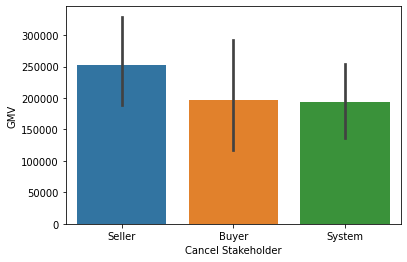

In [58]:
sns.barplot(x = 'Cancel Stakeholder', y = 'GMV', data = question_10)

In [50]:
# Filter Cancel Stakeholder = Seller
seller_stakeholder = paid_transaction_5[paid_transaction_5['Cancel Stakeholder'] == 'Seller']

# Find The Most Cancel Reason from Seller
seller_stakeholder.pivot_table(index='Cancel Reason', values='Cancel Stakeholder', aggfunc='count').sort_values(by='Cancel Stakeholder', ascending=False)

,Cancel Stakeholder
Cancel Reason,
No response from seller,337
Sold out,214
Delivery Delay,22
Incorrect price information,17


## Total Sales & Orders by Month

In [89]:
# Count Order Number & Transaction Amount every month
month_performance = paid_transaction_5.pivot_table(index ='Month', values = ['Order Number', 'Transaction Amount'], aggfunc={'Order Number':'count', 'Transaction Amount':'sum'})
month_performance

,Order Number,Transaction Amount
Month,,
201707,2000,508364300.0
201708,2000,545720000.0
201709,2000,553212800.0
201710,2000,295796600.0
201711,2000,662328900.0
201712,2000,640144300.0


In [77]:
paid_transaction_5['Month_Name'] = paid_transaction_5['Month_Name'].astype(str)

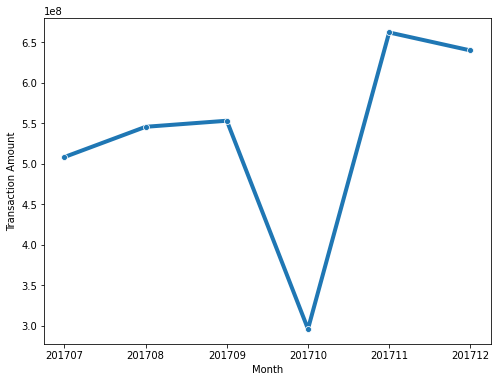

In [91]:
plt.rcParams['figure.figsize'] = (8,6)

sns.lineplot(x ='Month', y ='Transaction Amount', data = month_performance, linewidth=4, marker='o')

